# Random walk and diffusion

We are going to look at a 1D process: a particle of mass $m$ moves in solution (e.g., a small bead or virus in water or oil).

We will use numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.matplotlib.style.use("ggplot")
plt.rcParams['figure.figsize'] = (5, 4)

## Newton's equation of motion

Start with Newton's equations of motion for intertial motion:

$$
m\frac{dx^2}{dt^2} = f
$$

The force is derived from a conservative potential $U(x)$

$$
f = -\frac{dU}{dx}.
$$



## Langevin equation

But that's only the particle. Where is the water?

Model the solvent _implicitly_ by its influence on the bead
1. **friction** $-\gamma m v$ ($\gamma > 0$ is the *friction coefficient*)
2. random kicks $f_\text{random}$ from collisions

leading to the **Langevin equation**:

$$
m\frac{dx^2}{dt^2} = f - \gamma m \frac{dx}{dt} + f_\text{random}
$$




## Overdamped Langevin equation

If the friction is high then there is no inertial motion:

$$
0 = f - \gamma m \frac{dx}{dt} + f_\text{random}
$$

so the **overdamped Langevin equation** is

$$
\frac{dx}{dt} = \frac{1}{m\gamma}(f + f_\text{random})
$$


## Discretized dynamics

* Simulate over discrete time steps $\Delta t$
* $v = \Delta x/\Delta t$


$$
\Delta x = \frac{\Delta t}{m\gamma}(f + f_\text{random})
$$

$$
\Delta x = \Delta x_\text{deterministic} + \Delta x_\text{random}
$$

### Trajectories

- We are interested in *trajectories*, i.e. $x(t)$.
- Start at $x(t=0) = x_0$ (initial condition).
- Compute $\Delta x$ for subsequent times and add up steps:

  $$
  x(t) = x_0 + \Delta x(\Delta t) + \Delta x(2\Delta t) + \dots + \Delta x(t-\Delta t)
  $$


- Rewrite with discrete (indexed) notation with step $j$: 

  \begin{align}
  x_j &:= x(t=j\Delta t)\\
  x_{j+1} &= x_j + \Delta x_{j+1}
  \end{align}

- Deterministic force $f = f(x)$, i.e., $f_j = f(x_j)$ so
  $$
  \Delta x_\text{deterministic} = \frac{f(x_j)}{m\gamma} \Delta t
  $$
  (taking $f$ to be approximately constant over $\Delta t$)
- Random force: zero mean Gaussian distribution

### Random force/random displacement

* Zero mean: $\langle \Delta x_\text{random} \rangle = 0$
* Gaussian distributed: $\Delta x_\text{random} \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\Delta x_\text{random}^2}{2\sigma^2}\right)$
* Variance *must* be $\sigma^2 = \frac{2 k_B T \Delta t}{m \gamma}$ (to satisfy a fluctuation-dissipation theorem)

$k_B T$ is the typical energy in thermal fluctuations where $k_B = 1.380649 × 10^{−23}\,\text{J/K}$ is the [Boltzmann constant](https://en.wikipedia.org/wiki/Boltzmann_constant) and $T$ the temperature in Kelvin. 

#### Normal distribution
What does the Gaussian or **normal distribution** $\mathcal{N}$ look like?

$$
\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }.
$$

Python function for the normal probability density for mean $\mu$ and standard deviation $\sigma$:

In [2]:
def p_normal(x, mu=0, sigma=1):
    return np.exp(-0.5*((x - mu)/sigma)**2) / (np.sqrt(2*np.pi) * sigma)

Plot normal distribution for $\mu=0$, $\sigma=0.5$ over a range of $x$ values:

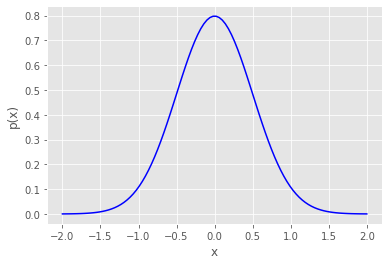

In [3]:
X = np.linspace(-2, 2, 100)
P = p_normal(X, mu=0, sigma=0.5)
plt.plot(X, P, color="blue")
plt.xlabel("x"); plt.ylabel("p(x)");

## Simple diffusion

No external force:

$$
f = 0
$$

so only random movement

$$
\Delta x = \Delta x_\text{random}
$$

## Generating random steps

$$
\Delta x_\text{random} \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\Delta x_\text{random}^2}{2\sigma^2}\right)
$$

with $\sigma^2 = \frac{2 k_B T \Delta t}{m \gamma}$.

I.e. the probability distribution $p(\Delta x_\text{random})$ is the normal distribution $\mathcal{N}(\Delta x_\text{random}; 0, \sigma)$



### Generating random numbers with numpy

How to generate Gaussian random displacements, i.e. **normally distributed** random numbers?

Use [numpy's random number generation](https://numpy.org/doc/stable/reference/random/index.html) facility:

Always start like this (create a random number generator instance `rng`) at the beginning of your code:

In [4]:
import numpy as np

rng = np.random.default_rng()

You then use `rng` throughout your code.

#### Samples from the normal distribution

$$
p(x) = \mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$


Get 1000 samples for $\mu = 0$ and $\sigma = 0.5$ using the [normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) method:

In [5]:
mu = 0
sigma = 0.5

x_samples = rng.normal(loc=mu, scale=sigma, size=1000)

<small>(`default_rng()` is the new and recommended way to generate random numbers in numpy. Previously, one used functions in [numpy.random](https://numpy.org/doc/stable/reference/random/) such as [numpy.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html#numpy.random.RandomState.normal) or [numpy.random.randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.randn.html#numpy.random.RandomState.randn). New code, however, should use the above approach that starts with a [numpy.random.Generator](https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data).)</small>

### Plotting random numbers

What do the samples and the distribution look like?

#### Samples

Plot the samples $x$:

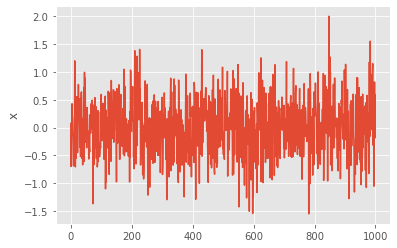

In [6]:
plt.plot(x_samples)
plt.ylabel("x");

#### Probability distribution from samples

How do we get an estimate for the **distribution** $p(x)$ from our samples?

##### Histogramming
**Histogram** the data with the [numpy.histogram()](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram) function (and then turn the counts into a probability density):

In [7]:
np.histogram(x_samples, bins=10)

(array([ 12,  36, 122, 226, 274, 208,  86,  31,   4,   1]),
 array([-1.55126948, -1.19586906, -0.84046863, -0.48506821, -0.12966779,
         0.22573263,  0.58113305,  0.93653347,  1.2919339 ,  1.64733432,
         2.00273474]))

Work with the `counts` (the histogram itself, related to $p(x)$) and the `edges` of the bins (related to the samples, our $x$ values)

In [8]:
counts, edges = np.histogram(x_samples, bins=10)

In [9]:
len(counts)

10

In [10]:
len(edges)

11

In [11]:
edges

array([-1.55126948, -1.19586906, -0.84046863, -0.48506821, -0.12966779,
        0.22573263,  0.58113305,  0.93653347,  1.2919339 ,  1.64733432,
        2.00273474])

##### Step-plot of histogram counts

Plot the lower edge of each bin:

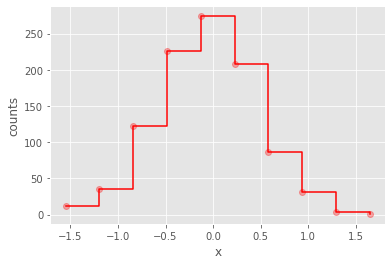

In [12]:
plt.step(edges[:-1], counts, color="red", where="post")
plt.xlabel("x")
plt.ylabel("counts")
plt.plot(edges[:-1], counts, color="red", marker="o", linestyle="", alpha=0.3)

##### Midpoints of bins

Get the *midpoints* $x_k$ of bins $0 \le k < N$ from the edges $e_k, 0 \le k < N+1$:

$$
x_k = \frac{e_k + e_{k+1}}{2}
$$

Python implementation with a loop:

In [13]:
x_values = [0.5*(edges[k] + edges[k+1]) for k in range(len(edges) - 1)]
np.array(x_values)

array([-1.37356927, -1.01816885, -0.66276842, -0.307368  ,  0.04803242,
        0.40343284,  0.75883326,  1.11423369,  1.46963411,  1.82503453])

Using fast **numpy array operations** for $x_k = (e_k + e_{k+1})/2$

```
    +---+---+---+---+------+---+----+
e = | 0 | 1 | 2 | 3 | .... | 9 | 10 |
    +---+---+---+---+------+---+----+
```

"Thinking in arrays": 

Calculate `e[k] + e[k+1]` as
```
           +---+---+---+---+------+---+
"e[k]" =   | 0 | 1 | 2 | 3 | .... | 9 |  = e[:-1]
           +---+---+---+---+------+---+
             +   +   +   +          +
           +---+---+---+---+------+---+
"e[k+1]" = | 1 | 2 | 3 | 4 | .... |10 |  = e[1:]
           +---+---+---+---+------+---+    
```

In [14]:
x_values = 0.5 * (edges[:-1] + edges[1:])
x_values

array([-1.37356927, -1.01816885, -0.66276842, -0.307368  ,  0.04803242,
        0.40343284,  0.75883326,  1.11423369,  1.46963411,  1.82503453])

Plot estimate histogram at the midpoints of the bins:

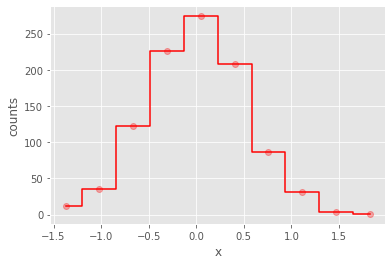

In [15]:
plt.step(x_values, counts, color="red", where="mid")
plt.xlabel("x")
plt.ylabel("counts")
plt.plot(x_values, counts, color="red", marker="o", linestyle="", alpha=0.3)

##### Probability distribution from samples

A probability distribution $p(x)$ over a continuous variable $x$ should be a *normalized density* , i.e.,

$$
\int_{-\infty}^{+\infty} \!\! p(x)\, dx = 1
$$

or for discrete bins with a value $p_k$ in bin $k$:

$$
\sum_{k=0}^{N-1} p_k \Delta x_k = 1
$$

where $\Delta x_k = (e_{k+1} - e_k)$ is the bin width of bin $k$.

Given counts $h_k$, one can compute the normalized probability density as

$$
p_k = \frac{h_k}{\sum_k h_k}\frac{1}{\Delta x_k}
$$

In [16]:
Delta_x = edges[1:] - edges[:-1]   # = np.diff(edges)
p_k = counts / (counts.sum() * Delta_x)

Check normalization:

In [17]:
np.sum(p_k * Delta_x)

0.9999999999999999

Plot estimate for the distribution $p(x)$ of our samples:

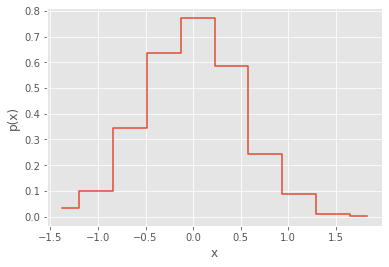

In [18]:
plt.step(x_values, p_k, where="mid")
plt.xlabel("x")
plt.ylabel("p(x)");

##### `numpy.histogram()` can generate densities

One can directly get a density (for constant bin width) with the `density=True` kwarg:

In [19]:
density, edges = np.histogram(x_samples, bins=10, density=True)

Check normalization:

In [20]:
np.sum(density * np.diff(edges))

0.9999999999999999

#### Comparison to the normal distribution
$$
\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$

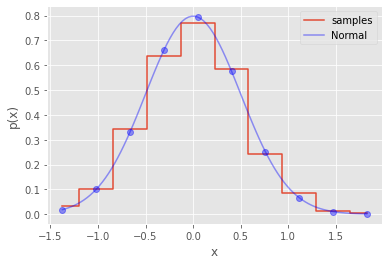

In [21]:
X = np.linspace(x_values.min(), x_values.max(), 100)

plt.step(x_values, p_k, where="mid", label="samples")

plt.plot(x_values, p_normal(x_values, mu=mu, sigma=sigma), marker="o", color="blue", linestyle="", alpha=0.4)
plt.plot(X, p_normal(X, mu=mu, sigma=sigma), color="blue", alpha=0.4, label="Normal")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend();

## Simulating random diffusion

We will simulate the diffusion of a small particle such as a [virus](http://book.bionumbers.org/how-big-are-viruses/). Specifically, we pick the harmless [Brome Mosaic Virus](https://en.wikipedia.org/wiki/Brome_mosaic_virus):

![Crystal structure of Brome mosaic virus](https://upload.wikimedia.org/wikipedia/commons/c/c0/Journal.pone.0142415.g001.C.png)

### Parameters

[Brome Mosaic virus](https://bionumbers.hms.harvard.edu/bionumber.aspx?id=105893&ver=3&trm=virus+mass&org=) particle

* mass $m=7.6\times 10^{-21} \text{kg}$ 
* friction coefficient $\gamma=3.4 \times 10^{10}\,\text{s}^{-1}$,  
* time step $\Delta t = 1\times10^{-9}\,\text{s}$, 
* temperature $T=300\,\text{K}$ 
* starting position $x_0 = 0$

### Algorithm (random diffusion)

1. Generate a random step
   $$
   \Delta x = \Delta x_\text{random}
   $$
   with
   $$
   \Delta x_\text{random} \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\Delta x_\text{random}^2}{2\sigma^2}\right)
   $$
   where $\sigma^2 = \frac{2 k_B T \Delta t}{m \gamma}$.
2. Save the step in `steps`.
3. If not reached max number of steps, go to 1.
4. Generate trajectory from steps 
   $$
   x_{j+1} = x_j + \Delta x_{j+1}
   $$
   i.e.,
   $$
   x_{k} = x_0 + \sum_{j=1}^{k} \Delta x_j
   $$


Define parameters

In [22]:
m = 7.6e-21      # kg
gamma = 3.4e10   # s^-1
dt = 10e-9       # s
T = 300          # K

kB = 1.380649e-23 # J/K

max_steps = 10000
x0 = 0           # m

sigma = np.sqrt(2*kB*T * dt / (m * gamma))  # m

In [23]:
sigma

5.662014951648707e-10

With $\Delta t = 10~\text{ns}$, the "typical" random step size $\sigma$ is on the order of 0.5 nm, i.e. with a virus particle size of ~50 nm, about 1/100 of the virus diameter.

Generate all steps:

   $$
   \Delta x = \Delta x_\text{random}
   $$
   with
   $$
   \Delta x_\text{random} \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\Delta x_\text{random}^2}{2\sigma^2}\right)
   $$

In [24]:
steps = rng.normal(loc=0, scale=sigma, size=max_steps)

Generate trajectory:

   $$
   x_{k} = x_0 + \sum_{j=1}^{k} \Delta x_j
   $$


In [25]:
x_trajectory = x0 + np.cumsum(steps)

In [26]:
x_trajectory[:5]

array([ 5.05723902e-10, -1.74979537e-10,  4.57238300e-10,  9.81406762e-10,
        1.26381263e-09])

Note: The first element *should* be 0: We need to include $x_0$ explicitly.
```python
x_trajectory = np.hstack([x0, x0 + np.cumsum(steps)])
```

Generate trajectory:

   $$
   x_{k} = x_0 + \sum_{j=0}^{k} \Delta x_j
   $$

with $\Delta x_0 = 0$.

In [27]:
steps = rng.normal(loc=0, scale=sigma, size=max_steps+1)     # note size
steps[0] = 0                                                 # dx_0 = 0

In [28]:
x_trajectory = x0 + np.cumsum(steps)

In [29]:
x_trajectory.shape

(10001,)

In [30]:
x_trajectory[:5]

array([ 0.00000000e+00,  5.52253827e-10, -9.28506712e-11, -1.33016092e-09,
       -1.56203920e-09])

### Plot random diffusion trajectory

In [31]:
times = dt * np.arange(len(x_trajectory))

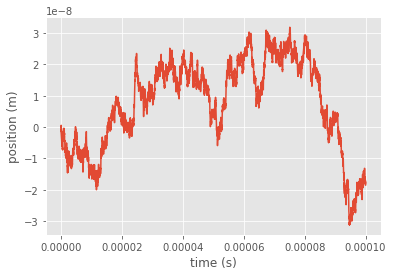

In [32]:
plt.plot(times, x_trajectory)
plt.xlabel("time (s)")
plt.ylabel("position (m)");

### Generate multiple trajectories

Each simulation run is different (**stochastic**): What is the *average* behavior?

Run multiple repeats:

In [33]:
N_repeats = 100

In [34]:
steps = rng.normal(loc=0, scale=sigma, size=(N_repeats, max_steps+1))
steps[:, 0] = 0       # step 0 with dx=0

In [35]:
steps.shape

(100, 10001)

In [36]:
x_trajectories = x0 + np.cumsum(steps, axis=1)

In [37]:
x_trajectories.shape

(100, 10001)

Plot the **ensemble of trajectories**

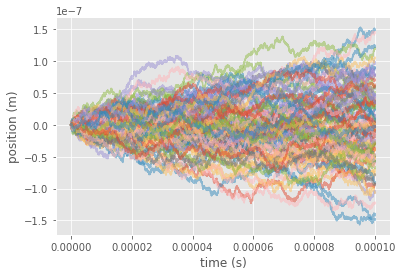

In [38]:
times = dt * np.arange(x_trajectories.shape[1])
plt.plot(times, x_trajectories.T, alpha=0.5);
plt.xlabel("time (s)")
plt.ylabel("position (m)");

To show more clearly the distribution of trajectories, with the first one hightlighted:

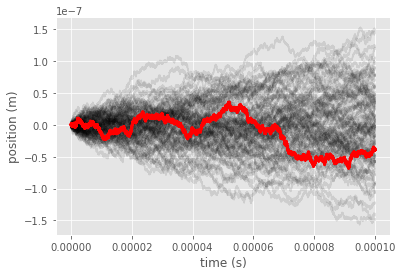

In [39]:
times = dt * np.arange(x_trajectories.shape[1])
plt.plot(times, x_trajectories.T, color="black", alpha=0.1);
plt.plot(times, x_trajectories[0], color="red", linewidth=3);
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.savefig("diffusion_trajectories.png")

## Analysing stochastic trajectories

Given the **trajectory ensemble**, what is the **average** behavior (what are the underlying physical laws that are obscured by the stochasticity?)

#### Mean position

Average (mean) position over $N$ trajectories $x_j(t)$

$$
\bar x(t) = \langle x(t) \rangle = \frac{1}{N} \sum_{j=1}^N x_j(t)
$$ 

where the average is performed *at each time step* $k$ (for $t = k \Delta t$):

$$
\bar x_k = \langle x_k \rangle = \frac{1}{N} \sum_{j=1}^N x_{j,k}
$$ 

In [40]:
x_mean = x_trajectories.mean(axis=0)
x_mean.shape

(10001,)

Plot the mean position $\bar{x}(t)$:

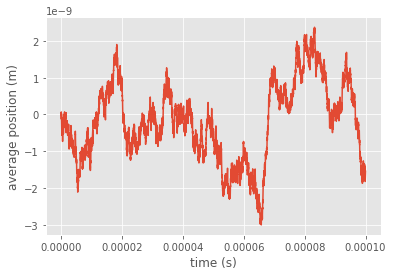

In [41]:
plt.plot(times, x_mean)
plt.xlabel("time (s)")
plt.ylabel("average position (m)");

To put it into perspective: the mean position $\langle x(t) \rangle$ is close to 0 when compared to the trajectories themselves:

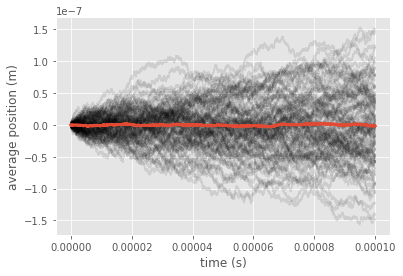

In [42]:
plt.plot(times, x_trajectories.T, alpha=0.1, color="black")
plt.plot(times, x_mean, linewidth=3)
plt.xlabel("time (s)")
plt.ylabel("average position (m)");

This should not be surprising: the normal distribution has mean 0.

#### Distance from starting point

Distance from origin $x_0$ is

$$
d(t) = \sqrt{(x(t) - x_0)^2}
$$

with the squared distance

$$
d^2(t) = (x(t) - x_0)^2
$$

being the important quantity that measures how far the particle got away from $x_0$.

Averaging over many trajectories we obtain the **mean squared distance**

$$
\text{MSD}(t) = \langle d^2(t) \rangle = \langle (x(t) - x_0)^2 \rangle
$$


The **root mean square distance** is then simply
$$
\text{RMSD}(t) = \sqrt{\text{MSD}(t)} = \sqrt{\langle(x(t) - x_0)^2\rangle}
$$




For a single trajectory, the $d^2(t)$ is noisy:

In [43]:
D2 = (x_trajectory - x0)**2

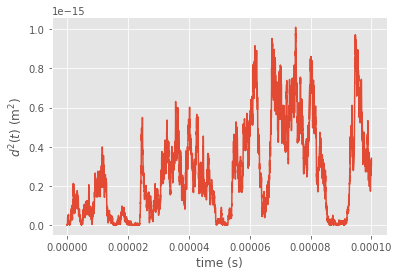

In [44]:
plt.plot(times, D2)
plt.xlabel("time (s)")
plt.ylabel(r"$d^2(t)$ (m$^2$)");

Averaging $d^2(t)$ over many trajectories gives the MSD:

In [45]:
MSD = np.mean((x_trajectories - x0)**2, axis=0)

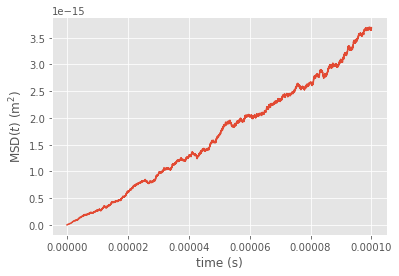

In [46]:
plt.plot(times, MSD)
plt.xlabel("time (s)")
plt.ylabel(r"$\mathrm{MSD}(t)$ (m$^2$)");

The MSD is approximately linear with time, as given by the Einstein diffusion equation (in 1D)

$$
\lim_{t\rightarrow\infty} \text{MSD}(t) =  2 D t
$$

With the  [Einstein relation](https://en.wikipedia.org/wiki/Einstein_relation_(kinetic_theory)) (also: a fluctation-dissipation theorem for diffusion coefficient $D$ and drag coefficient $\zeta$)

$$
D = \frac{kT}{\zeta} \quad\text{and}\quad \zeta = m\gamma
$$
we can plot the theoretical MSD.

An equivalent form uses the mobility $\mu = \zeta^{-1}$ ($\mathbf{v} = \mu \mathbf{F}$)

$$
D = \mu kT
$$


In [47]:
D = kB * T / (m * gamma)
print(D)

1.6029206656346748e-11


In [48]:
MSD_theory = 2 * D * times

Simulation and theoretical MSD plotted together:

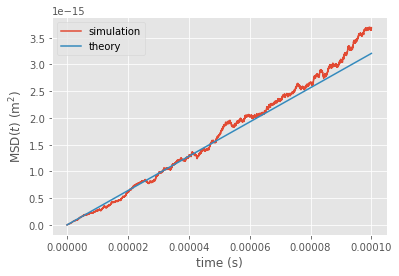

In [49]:
plt.plot(times, MSD, label="simulation")
plt.plot(times, MSD_theory, label="theory")
plt.xlabel("time (s)")
plt.ylabel(r"$\mathrm{MSD}(t)$ (m$^2$)")
plt.legend();

# Further exploration

- Increase the number of trajectories: Does the MSD get closer to the theorectical value?
- Increase the length of trajectories: Does the MSD get closer to the theorectical value?
- Estimate the distribution $p(x(t))$ (hint: use the histogram over the ensemble at fixed times $t$ and fix the bins; this distribution evolves over time); compare to the theoretical distribution (which is a Gaussian — why?)
- Obtain an estimate of $D$ from the trajectories.
- Have the particles move in a potential $U(x)$ and include the deterministic force,
- Extend the code to 2D. (Note: in $d$ dimensions, $\lim_{t\rightarrow+\infty} \langle (\mathbf{x}(t) - \mathbf{x}_0)^2\rangle = 2dDt$)

# Appendix


## Parameters for the Brome Mosaic Virus 

Data for the Brome Mosaic Virus
* [mass](https://bionumbers.hms.harvard.edu/search.aspx?task=searchbytrmorg&log=y&trm=Brome%20Mosaic%20Virus) 4.6e3 kDa
* [D](https://bionumbers.hms.harvard.edu/bionumber.aspx?id=105894&ver=2&trm=Brome+Mosaic+Virus&org=) = 15.5 µm^2 s^-1 (T = 20ºC)

In [50]:
Da = 1.660539066601e-27 # kg
T = 20 + 273.15 # K
kB = 1.380649e-23 # J/K

m_BMV = 4.6e3 * 1e3 * Da # kg
D_BMV = 15.5 * (1e-6)**2 # m^2/s 

In [51]:
print(f"mass = {m_BMV:.2g} kg")
print(f"T = {T:.1f} K")

mass = 7.6e-21 kg
T = 293.1 K


$\gamma$ from [Einstein relation](https://en.wikipedia.org/wiki/Einstein_relation_(kinetic_theory)) (fluctuation-dissipation relationship between diffusion coefficient $D$ and drag coefficient $\zeta = m\gamma$)
\begin{align}
D &= \frac{kT}{\zeta} = \frac{kT}{m\gamma}\\
\gamma &= \frac{kT}{mD}
\end{align}

In [52]:
gamma_BMV = kB*T / (m_BMV * D_BMV)
print(f"gamma = {gamma_BMV:.2g} s^-1")

gamma = 3.4e+10 s^-1


## Finding $D$ by linear fit

We can use [scipy.optimize.curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) as a "black box" fitting function (it minimizes the RMSD between fit function and data):

In [53]:
# with scipy
from scipy import optimize

def diff_fit(t, D, x0=0):
    return 2 * D * t  + x0

In [54]:
params, params_covariance = optimize.curve_fit(diff_fit, times, MSD, p0=[1])
D_fit, = params

print(f"D = {D:.2g}   D_fit = {D_fit:.2g}")

D = 1.6e-11   D_fit = 1.7e-11


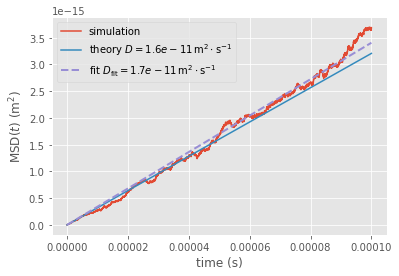

In [55]:
MSD_fit = diff_fit(times, D_fit)

plt.plot(times, MSD, label="simulation")
plt.plot(times, MSD_theory, label=r"theory $D={0:.3g}\,\mathrm{{m}}^2\cdot\mathrm{{s}}^{{-1}}$".format(D))
plt.plot(times, MSD_fit, linestyle="--", linewidth=2,
         label=r"fit $D_\mathrm{{fit}}={0:.3g}\,\mathrm{{m}}^2\cdot\mathrm{{s}}^{{-1}}$".format(D_fit))
plt.xlabel("time (s)")
plt.ylabel(r"$\mathrm{MSD}(t)$ (m$^2$)")
plt.legend()
plt.savefig("diffusion_sim_theory_fit.png")